Importing the pdb structure

from biopandas.pdb import PandasPdb
import sys
import re
import matplotlib.pyplot as plt
from matplotlib import cm
import math
import numpy as np


def find_structure_params(structure):
    
    structure_data={}
    
    for index, row in structure_atoms.iterrows():
        print  row.keys#row['atom_name']
        




In [421]:
import Bio
from Bio.PDB import *
import sys
import re
import matplotlib.pyplot as plt
from matplotlib import cm
import math
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

#import pandas as pd #pandas är en python modul for att hantera s.k DataFrames.
 
        
def find_structure_params(structure):
    
    #structure_data.append([Chain_id,Seg_id, residue_name, atom_name, atom_coord_vector])
    structure_data={}
    res_key = ''
    
    for model in structure:
        for chain in model:
            #for atom in structure.get_atoms():  If I want all atoms in a structure, depends if I want the residue
            for residue in chain:
                if residue.get_full_id()[3][0]==' ':  #If I want to remove HOH etc (hetero-atoms) use this!
                    for atom in residue:
                        key = chain.get_id() + str(atom.serial_number)
                        structure_data[key]=([chain.get_id(),residue.get_resname(),atom.get_name(),atom.get_vector()])
                        
                        #Giving the C-terminal O its own name for when making the atom layers
                        if atom.get_name()=='OXT':
                            structure_data[res_key][2]=structure_data[res_key][2]+'Cterm'
                        res_key = key
   # for i in structure_data:
       # if i[0]=='L':
     #       print i


    return (structure_data)




How to find different atoms for the 11 layers

In [422]:
def make_atom_layers(structure_data):
    
    layer1_check = ['CYS:SG','MET:SD','MSE:SE']
    layer2_check = ['ASN:ND2','GLN:NE2'] #Backbone N
    layer3_check = ['HIS:ND1','HIS:NE1','TRP:NE1']
    layer4_check = ['ARG:NE','ARG:NH1','ARG:NH2','ARG:NH3']
    layer5_check = ['LYS:NZ']
    layer6_check = ['ASN:OD1','GLN:OE1'] #Backbone O?
    layer7_check = ['SER:OG','THR:OG1','TYR:OH']
    layer8_check = ['ASP:OD1','ASP:OD2','ASP:OD3','GLU:OE1','GLU:OE2','GLU:OE3']
    layer9_check = ['ARG:CZ','ASN:CG','ASP:CG','GLN:CD','GLU:CD'] #Backbone C?
    layer10_check = ['HIS:CG','HIS:CD2','HIS:CE1','PHE:CG','PHE:CD1','PHE:CD2','PHE:CD3','PHE:CE1','PHE:CE2','PHE:CE3','PHE:CZ','TRP:CG','TRP:CD1','TRP:CD2','TRP:CD3','TRP:CD3','TRP:CE1','TRP:CE2','TRP:CE3','TRP:CZ1','TRP:CZ2','TRP:CZ3','TRP:CH2','TYR:CG','TYR:CD1','TYR:CD2','TYR:CD3','TYR:CE1','TYR:CE2','TYR:CE3','TYR:CZ']
    layer11_check = ['ALA:CB','ARG:CB','ARG:CG','ARG:CD','ASN:CB','ASP:CB','CYS:CB','GLN:CB','GLN:CG','GLU:CB','GLU:CG','HIS:CB','ILE:CB','ILE:CG1','ILE:CG2','ILE:CG3','ILE:CD1','LEU:CB','LEU:CG','LEU:CD1','LEU:CD2','LEU:CD3','LYS:CB','LYS:CG','LYS:CD','LYS:CE','MET:CB','MET:CG','MET:CE','MSE:CB','MSE:CG','MSE:CE','PHE:CB','PRO:CB','PRO:CG','PRO:CD','SER:CB','THR:CB','THR:CG2','TRP:CB','TYR:CB','VAL:CB','VAL:CG1','VAL:CG2','VAL:CG3'] #Backbone CA?
    
    layers={}
    
    for key, atom in structure_data.iteritems():
        if atom[2] == 'N':
            layers.setdefault('2', []).append(atom)
        elif atom[2] == 'O':
            layers.setdefault('6', []).append(atom)
        elif atom[2] == 'C':
            layers.setdefault('9', []).append(atom)
        elif atom[2] == 'CA':
            layers.setdefault('11', []).append(atom)
        elif atom[2] == 'OXT':
            layers.setdefault('8', []).append(atom)
        elif atom[2] == 'OCterm': #C-terminal O
            layers.setdefault('8', []).append(atom)
        else:
            atom_type = atom[1] + ':' + atom[2]
            if atom_type in layer1_check:
                layers.setdefault('1', []).append(atom)
            elif atom_type in layer2_check:
                layers.setdefault('2', []).append(atom)
            elif atom_type in layer3_check:
                layers.setdefault('3', []).append(atom)
            elif atom_type in layer4_check:
                layers.setdefault('4', []).append(atom)
            elif atom_type in layer5_check:
                layers.setdefault('5', []).append(atom)
            elif atom_type in layer6_check:
                layers.setdefault('6', []).append(atom)
            elif atom_type in layer7_check:
                layers.setdefault('7', []).append(atom)
            elif atom_type in layer8_check:
                layers.setdefault('8', []).append(atom)
            elif atom_type in layer9_check:
                layers.setdefault('9', []).append(atom)
            elif atom_type in layer10_check:
                layers.setdefault('10', []).append(atom)
            elif atom_type in layer11_check:
                layers.setdefault('11', []).append(atom)
            else:
                print str(key) + str(atom[1:3]) + ' Has not been assigned to any layer' #layers.setdefault('12', []).append(atom)
    
    #This is to check if anything is not sorted into a layer            
    #for key,atom in layers.iteritems():
        #if key=='12':
           # for x in atom:
             #   print x

    return(layers)

In [423]:
def find_midpoint(structure_data):
    
    allvectors = Vector([0,0,0])

    i=0     
    for key, atom in structure_data.iteritems():
        allvectors=allvectors+atom[3]
        i=i+1
    midpoint=allvectors/i
    return(midpoint)    

In [424]:
def normalize_in_origo(midpoint,structure_data):

    for key,atom in structure_data.iteritems():
        newvector = atom[3] - midpoint
        atom_new=[atom[0],atom[1],atom[2],newvector]
        structure_data[key]=atom_new

    return (structure_data)

In [425]:
def make_density_maps(layers):
    
        density_maps= []
        for g in range(1, 12):
            density_maps.append(np.zeros((120,120,120)))
            
        for key,atom in layers.iteritems():
            for pos in atom:
                x=int(np.around(pos[3][0], decimals=0))+60
                y=int(np.around(pos[3][1], decimals=0))+60
                z=int(np.around(pos[3][2], decimals=0))+60
                
                for xx in range(-2,3):
                    for yy in range(-2,3):
                        for zz in range(-2,3):
                            r=float(max(abs(xx),abs(yy),abs(zz)))
                            density=math.exp(-((r**2)/2))
                            density_maps[(int(key)-1)][x+xx][y+yy][z+zz]=density_maps[(int(key)-1)][x+xx][y+yy][z+zz]+density


        #This is only for plotting the data in python, otherwise a numpy array is made over all layers
        x_values=[]
        y_values=[]
        z_values=[]
        density_values = []
        
        for x in range(0,120):
            for y in range(0,120):
                for z in range(0,120):
                    if density_maps[1][x][y][z]>0.0:
                        x_values.append(x)
                        y_values.append(y)
                        z_values.append(z)
                        density_values.append(density_maps[1][x][y][z])
        
        return (density_maps,x_values,y_values,z_values,density_values)               

In [426]:
def plot_4d(x_values,y_values,z_values,density_value):
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    # choose your colormap
    cmap = plt.cm.jet

    # get a Nx4 array of RGBA corresponding to zs
    # cmap expects values between 0 and 1
    density_values = np.array(density_value) # if z_list is type `list`
    colors = cmap(density_value)

    # set the alpha values according to i_list
    # must satisfy 0 <= i <= 1
    density_value = np.array(density_value)
    colors[:,-1] = density_values / density_values.max()

    # then plot
    fig = plt.figure() 
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_values, y_values, z_values, c=colors)
    plt.show()



In [427]:
def make_mrcfile(density_maps):
    import mrcfile
    
    density_map1=density_maps[7].astype(np.float32)

    #mrc=mrcfile.open('tmp.mrc')
    #print mrc.data
    with mrcfile.new('tmp.mrc',overwrite=True) as mrc:
        mrc.set_data(density_map1)

A1777['HIS', 'NE2'] Has not been assigned to any layer
B3055['HIS', 'NE2'] Has not been assigned to any layer
A1575['HIS', 'NE2'] Has not been assigned to any layer
A1978['HIS', 'NE2'] Has not been assigned to any layer
A782['HIS', 'NE2'] Has not been assigned to any layer
A527['HIS', 'NE2'] Has not been assigned to any layer
B2173['HIS', 'NE2'] Has not been assigned to any layer
A580['HIS', 'NE2'] Has not been assigned to any layer
A1122['HIS', 'NE2'] Has not been assigned to any layer
A0['HIS', 'HE2'] Has not been assigned to any layer
A983['HIS', 'NE2'] Has not been assigned to any layer
B2358['HIS', 'NE2'] Has not been assigned to any layer
B2783['HIS', 'NE2'] Has not been assigned to any layer
A127['HIS', 'NE2'] Has not been assigned to any layer
B2315['HIS', 'NE2'] Has not been assigned to any layer
B3544['HIS', 'NE2'] Has not been assigned to any layer
A1522['HIS', 'NE2'] Has not been assigned to any layer
B0['THR', '3HG2'] Has not been assigned to any layer


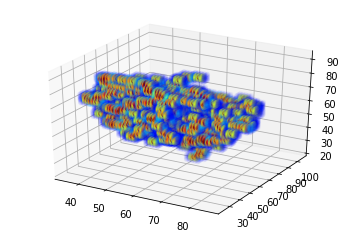

In [428]:
def main():
    filename_pdb = '/home/joakim/Downloads/D1A2K-a0a-merged.pdb'#'/home/joakim/Downloads/2HIY_A.pdb' #'/home/joakim/Downloads/D1A2K-a0a-merged.pdb'
    try: 
        PDBobj = PDBParser()
        structure = PDBobj.get_structure(filename_pdb, filename_pdb)

    except IOError: 
        print 'IO Error', filename_pdb       
        while 'true':
            input1=raw_input("Error parsing PDB file! Continue(y/n)...")
            if input1.lower()=='y':
                break
            elif input1.lower()=='n':
                sys.exit()
   # structure=PandasPdb().read_pdb(filename_pdb)
   # structure_atoms = structure.df['ATOM']
    
    
    #df=pd.read_excel('cross_val_sets.xls')
    #print df

    
    structure_data = find_structure_params(structure)
    
    midpoint = find_midpoint(structure_data) #Avrundning gör att det blir lite konstigt,!! Kolla upp

    structure_data = normalize_in_origo(midpoint,structure_data)
    
    layers = make_atom_layers(structure_data)
    
    #for key,values in layers.iteritems():
        #print key, len(values)

    #Create 11 density maps (zeros)
    (density_maps,x_values,y_values,z_values,density_values) = make_density_maps(layers)
    density_maps=density_maps
    
    make_mrcfile(density_maps)

    plot_4d(x_values,y_values,z_values,density_values)

    
    
if __name__ == '__main__':
  main()